# Оптимизация гиперпараметров

# Содержание работы

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Сгенерировать датасет для задачи бинарной классификации с использованием функции make_classification.

In [2]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1)

In [3]:
X.shape, Y.shape

((1000, 5), (1000,))

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [5]:
X_train.shape, Y_train.shape

((800, 5), (800,))

In [6]:
X_test.shape, Y_test.shape

((200, 5), (200,))

### 2. Построить и оценить качество различных моделей классификации, используя метрики accuracy и F1-score.

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [8]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

In [9]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [10]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)

In [11]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df.sort_values(by=["score"], ascending=False, inplace=True)
df

,name,score
9,Neural_Net,0.865
1,Linear_SVM,0.860
8,Random_Forest,0.860
4,Gaussian_Process,0.860
11,Naive_Bayes,0.855
6,Decision_Tree,0.855
12,QDA,0.850
0,Nearest_Neighbors,0.850
5,Gradient_Boosting,0.850
10,AdaBoost,0.840


In [12]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
9,Neural_Net,0.865000
1,Linear_SVM,0.860000
8,Random_Forest,0.860000
4,Gaussian_Process,0.860000
11,Naive_Bayes,0.855000
6,Decision_Tree,0.855000
12,QDA,0.850000
0,Nearest_Neighbors,0.850000
5,Gradient_Boosting,0.850000
10,AdaBoost,0.840000


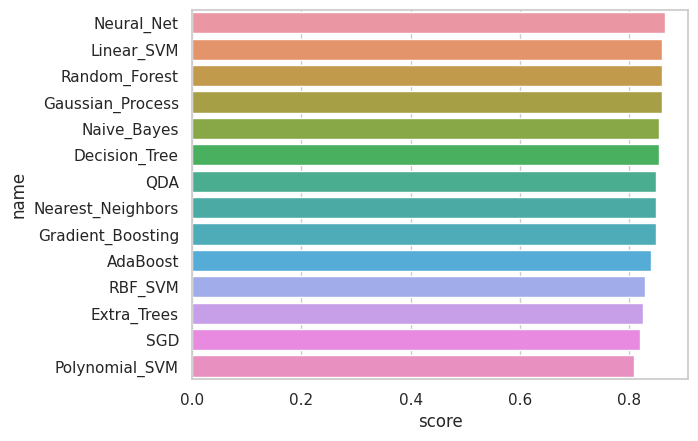

In [13]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

### 3. Построить модель elasticnet на данных прогнозирования продаж.

In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML4.5%20hyperparameters/data/Advertising.csv")

In [15]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [16]:
## Создаём X и y
X = df.drop('sales',axis=1)
y = df['sales']

# Разбиение на обучающий и тестовый наборы - TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Масштабирование данных (SCALE)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.linear_model import ElasticNet
help(ElasticNet)

Help on class ElasticNet in module sklearn.linear_model._coordinate_descent:

class ElasticNet(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, sklearn.linear_model._base.LinearModel)
 |  ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear regression with combined L1 and L2 priors as regularizer.
 |  
 |  Minimizes the objective function::
 |  
 |          1 / (2 * n_samples) * ||y - Xw||^2_2
 |          + alpha * l1_ratio * ||w||_1
 |          + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
 |  
 |  If you are interested in controlling the L1 and L2 penalty
 |  separately, keep in mind that this is equivalent to::
 |  
 |          a * ||w||_1 + 0.5 * b * ||w||_2^2
 |  
 |  where::
 |  
 |          alpha = a + b and l1_ratio = a / (a + b)
 |  
 |  The parameter l1_ratio corresponds to alpha in the glmnet R package while
 |  alph

### 4. Оптимизировать гиперпараметры данной модели с помощью поиска по сетке.

In [18]:
base_elastic_model = ElasticNet()

In [19]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)

In [30]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [25]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1)

In [27]:
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=0.1, l1_ratio=1)

In [29]:
y_pred = grid_model.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

2.387342642087474

# Контрольные вопросы

### Зачем нужно производить оптимизацию гиперпараметров?
Чтобы найти такие значения параметров модели, при которых она показывает наилучшее качество на новых данных.

### В чём заключается процесс оптимизации гиперпараметров?
Перебор различных комбинаций гиперпараметров и оценка качества модели с помощью кросс-валидации.

### Достоинства и недостатки GridSearchCV:
**+** Полный перебор всех комбинаций — надёжный  
**–** Долгое время работы при большом количестве параметров

### Другие стратегии оптимизации гиперпараметров:
- **RandomizedSearchCV**
- **Bayesian Optimization**
- **Hyperopt**
- **Optuna**
- **Genetic Algorithms**

### Почему при использовании GridSearchCV не нужна валидационная выборка?
GridSearchCV сам использует кросс-валидацию, что исключает необходимость отдельной валидационной выборки.


# Дополнительные задания

### 1. При выборе модели мы обычно выбираем ту, которая дает наибольшее значение какой-то метрики. Но это означает, что эта оценка метрики уже становится завышенной. Поэтому для объективной оценки качества модели ее опять следует оценить на новом наборе данных. Поэтому для выбора модели нужно разделить выборку на три части - обучающую, валидационную и тестовую. Повторите первую часть работы, но с таким разбиением и получите несмещенную оценку качества наилучшей модели.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1)

# Разделение: 60% train, 20% validation, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")
]

results = []


for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    val_score = clf.score(X_val, y_val)
    results.append((name, clf, val_score))


results.sort(key=lambda x: x[2], reverse=True)

best_name, best_model, val_score = results[0]
test_score = best_model.score(X_test, y_test)

print(f"Лучшая модель: {best_name}")
print(f"F1 на валидации: {val_score:.4f}")
print(f"F1 на тесте: {test_score:.4f}")

df = pd.DataFrame([(name, score) for name, _, score in results], columns=["Model", "Validation Score"])
df

Лучшая модель: Gaussian_Process
F1 на валидации: 0.8600
F1 на тесте: 0.8750


,Model,Validation Score
0,Gaussian_Process,0.860
1,Neural_Net,0.855
2,Polynomial_SVM,0.840
3,Random_Forest,0.840
4,QDA,0.840
5,Linear_SVM,0.835
6,Naive_Bayes,0.835
7,Nearest_Neighbors,0.830
8,Gradient_Boosting,0.825
9,Decision_Tree,0.825


### 2. Оптимизируйте гиперпараметры той же модели, но другим методом - случайным поиском. Сравните полученные результаты.

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

X, y = make_regression(n_samples=1000, n_features=20, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_dist = {
    "alpha": np.logspace(-4, 1, 100),
    "l1_ratio": np.linspace(0, 1, 100)
}

random_search = RandomizedSearchCV(
    ElasticNet(), param_distributions=param_dist,
    n_iter=30, cv=5, scoring="neg_mean_squared_error", random_state=42
)
random_search.fit(X_train, y_train)
best_random_model = random_search.best_estimator_

y_pred_random = best_random_model.predict(X_test)
random_rmse = np.sqrt(mean_squared_error(y_test, y_pred_random))

param_grid = {
    "alpha": [0.001, 0.01, 0.1, 1, 10],
    "l1_ratio": [0.1, 0.3, 0.5, 0.7, 1.0]
}

grid_search = GridSearchCV(
    ElasticNet(), param_grid=param_grid,
    cv=5, scoring="neg_mean_squared_error"
)
grid_search.fit(X_train, y_train)
best_grid_model = grid_search.best_estimator_

y_pred_grid = best_grid_model.predict(X_test)
grid_rmse = np.sqrt(mean_squared_error(y_test, y_pred_grid))

print("RandomizedSearchCV RMSE: %.4f" % random_rmse)
print("GridSearchCV RMSE: %.4f" % grid_rmse)

RandomizedSearchCV RMSE: 0.3352
GridSearchCV RMSE: 0.3360


### 3. Во второй задаче найдите наиболее эффективный класс моделей, а затем оптимизируйте гиперпараметры у этой модели. Сравните, насколько лучше получилась модель.

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct, Matern, RationalQuadratic
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


X, y = make_classification(n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

default_model = GaussianProcessClassifier()
default_model.fit(X_train, y_train)
default_preds = default_model.predict(X_test)
default_acc = accuracy_score(y_test, default_preds)

# Подбор гиперпараметров (ядро и параметр регуляризации)
param_grid = {
    "kernel": [1.0 * RBF(length_scale) for length_scale in [0.1, 1.0, 10.0]] +
              [1.0 * Matern(length_scale=l, nu=1.5) for l in [0.1, 1.0, 10.0]] +
              [1.0 * RationalQuadratic(alpha=a, length_scale=l) for a in [0.1, 1.0] for l in [0.1, 1.0]],
}

grid_search = GridSearchCV(GaussianProcessClassifier(), param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_preds = best_model.predict(X_test)
best_acc = accuracy_score(y_test, best_preds)

print("Accuracy (по умолчанию):", round(default_acc, 4))
print("Accuracy (оптимизированная):", round(best_acc, 4))
print("Лучшее ядро:", best_model.kernel)


/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/evgeniilaz/Python/Stepik/ven

Accuracy (по умолчанию): 0.88
Accuracy (оптимизированная): 0.88
Лучшее ядро: 1**2 * RationalQuadratic(alpha=0.1, length_scale=0.1)
